### Filtered Movies with less than 100 reviews to obtain consistency in the results

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Load The Data Set

In [3]:
columns = ['user_id','item_id','rating','timestamp']

# Default header = 0 : takes first row as headers

# header = None to omit default behaviour

# name = set column names here explity

df = pd.read_csv('./ml-100k/u.data',sep='\t',names = columns)
df.head()

,user_id,item_id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [4]:
# unique users
df.user_id.nunique()

943

In [5]:
df.item_id.nunique()

1682

In [6]:
column_movies = ["movie id" , "movie title" , "release date" , "video release date" , "IMDb URL" , "unknown" , "Action" , "Adventure" ,"Animation", "Children's" , "Comedy" , "Crime" , "Documentary" , "Drama" , "Fantasy","Film-Noir", "Horror", "Musical", "Mystery","Romance", "Sci-Fi", "Thriller","War", "Western"]

# Default header = 0 : takes first row as headers

# header = None to omit default behaviour

# name = set column names here explity

movies = pd.read_csv('./ml-100k/u.item',sep='\|',names = column_movies)
movies.head()

,movie id,movie title,release date,video release date,IMDb URL,unknown,Action,Adventure,Animation,Children's,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [7]:
movie_title = movies[['movie id','movie title']]
movie_title.columns=['item_id','Title']
movie_title.head()

,item_id,Title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


### Merging two Data Frames into One


In [8]:
df = pd.merge(df,movie_title,on='item_id')
df.head()

,user_id,item_id,rating,timestamp,Title
0,196,242,3,881250949,Kolya (1996)
1,63,242,3,875747190,Kolya (1996)
2,226,242,5,883888671,Kolya (1996)
3,154,242,3,879138235,Kolya (1996)
4,306,242,5,876503793,Kolya (1996)


### Exploratory Data Analysis

In [9]:
((df.groupby('Title').mean()['rating'].sort_values()).value_counts())

3.000000    101
1.000000     69
2.000000     52
4.000000     41
2.500000     33
           ... 
2.396825      1
3.968254      1
3.790123      1
4.292929      1
4.204360      1
Name: rating, Length: 896, dtype: int64

In [10]:
#print(df)


avg_df = df.groupby('Title').mean()
avg_df.reset_index(level=0, inplace=True)

count_df = df.groupby('Title').count()
count_df.reset_index(level=0, inplace=True)


avg_df = avg_df[['Title','rating']]
count_df = count_df[['Title','rating']]
count_df.columns = ['Title','count']
merged_df = pd.merge(avg_df,count_df)
print(avg_df)
print(count_df)
print(merged_df.sort_values(by=['rating','count']))
merged_df.sort_values(by=['rating','count']).to_csv('movie.csv')



                                      Title    rating
0                 'Til There Was You (1997)  2.333333
1                              1-900 (1994)  2.600000
2                     101 Dalmatians (1996)  2.908257
3                       12 Angry Men (1957)  4.344000
4                                187 (1997)  3.024390
...                                     ...       ...
1659                   Young Guns II (1990)  2.772727
1660  Young Poisoner's Handbook, The (1995)  3.341463
1661                Zeus and Roxanne (1997)  2.166667
1662                                unknown  3.444444
1663     Á köldum klaka (Cold Fever) (1994)  3.000000

[1664 rows x 2 columns]
                                      Title  count
0                 'Til There Was You (1997)      9
1                              1-900 (1994)      5
2                     101 Dalmatians (1996)    109
3                       12 Angry Men (1957)    125
4                                187 (1997)     41
...                  

In [70]:
temp_df = merged_df[merged_df['count']>99]
req_titles = list(temp_df['Title'])
#print(req_titles)
df = df[df['Title'].isin(req_titles)]
df

,user_id,item_id,rating,timestamp,Title
0,196,242,3,881250949,Kolya (1996)
1,63,242,3,875747190,Kolya (1996)
2,226,242,5,883888671,Kolya (1996)
3,154,242,3,879138235,Kolya (1996)
4,306,242,5,876503793,Kolya (1996)
...,...,...,...,...,...
96347,305,865,3,886323563,"Ice Storm, The (1997)"
96348,707,865,5,886286360,"Ice Storm, The (1997)"
96349,655,865,4,887523909,"Ice Storm, The (1997)"
96350,639,865,1,891239427,"Ice Storm, The (1997)"


In [71]:
#print(df)


avg_df = df.groupby('Title').mean()
avg_df.reset_index(level=0, inplace=True)

count_df = df.groupby('Title').count()
count_df.reset_index(level=0, inplace=True)


avg_df = avg_df[['Title','rating']]
count_df = count_df[['Title','rating']]
count_df.columns = ['Title','count']
merged_df = pd.merge(avg_df,count_df)
print(avg_df)
print(count_df)
print(merged_df)


                                            Title    rating
0                           101 Dalmatians (1996)  2.908257
1                             12 Angry Men (1957)  4.344000
2                    2001: A Space Odyssey (1968)  3.969112
3                           Absolute Power (1997)  3.370079
4                               Abyss, The (1989)  3.589404
..                                            ...       ...
333  Willy Wonka and the Chocolate Factory (1971)  3.631902
334                      Wizard of Oz, The (1939)  4.077236
335                    Wrong Trousers, The (1993)  4.466102
336                     Young Frankenstein (1974)  3.945000
337                             Young Guns (1988)  3.207921

[338 rows x 2 columns]
                                            Title  count
0                           101 Dalmatians (1996)    109
1                             12 Angry Men (1957)    125
2                    2001: A Space Odyssey (1968)    259
3                           

In [72]:
merged_df


,Title,rating,count
0,101 Dalmatians (1996),2.908257,109
1,12 Angry Men (1957),4.344000,125
2,2001: A Space Odyssey (1968),3.969112,259
3,Absolute Power (1997),3.370079,127
4,"Abyss, The (1989)",3.589404,151
...,...,...,...
333,Willy Wonka and the Chocolate Factory (1971),3.631902,326
334,"Wizard of Oz, The (1939)",4.077236,246
335,"Wrong Trousers, The (1993)",4.466102,118
336,Young Frankenstein (1974),3.945000,200


In [73]:
rating = pd.DataFrame(df.groupby('Title').mean()['rating'])
print(rating.head())


                                rating
Title                                 
101 Dalmatians (1996)         2.908257
12 Angry Men (1957)           4.344000
2001: A Space Odyssey (1968)  3.969112
Absolute Power (1997)         3.370079
Abyss, The (1989)             3.589404


In [74]:
rating['count'] = pd.DataFrame(df.groupby('Title').count()['rating'])

In [75]:
rating

,rating,count
Title,,
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
2001: A Space Odyssey (1968),3.969112,259
Absolute Power (1997),3.370079,127
"Abyss, The (1989)",3.589404,151
...,...,...
Willy Wonka and the Chocolate Factory (1971),3.631902,326
"Wizard of Oz, The (1939)",4.077236,246
"Wrong Trousers, The (1993)",4.466102,118


In [76]:
rating.sort_values(by='rating',ascending=False)


,rating,count
Title,,
"Close Shave, A (1995)",4.491071,112
Schindler's List (1993),4.466443,298
"Wrong Trousers, The (1993)",4.466102,118
Casablanca (1942),4.456790,243
"Shawshank Redemption, The (1994)",4.445230,283
...,...,...
Spawn (1997),2.615385,143
Event Horizon (1997),2.574803,127
Crash (1996),2.546875,128


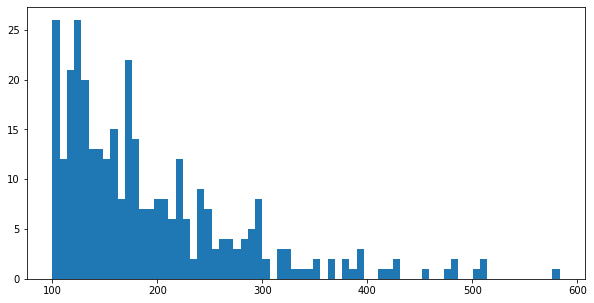

In [77]:
plt.figure(figsize=(10,5))
plt.hist(merged_df['count'],bins = 70)
plt.show()

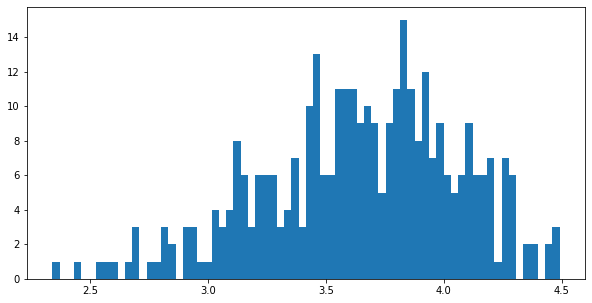

In [78]:
plt.figure(figsize=(10,5))
plt.hist(merged_df['rating'],bins = 70)
plt.show()

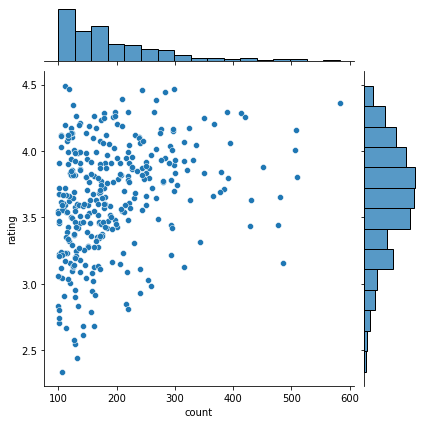

In [79]:
sns.jointplot(x='count',y='rating',data=merged_df)

In [82]:
indexed_df = merged_df
indexed_df=indexed_df.set_index('Title')
#print(indexed_df.loc['Hollow Reed (1996)'])

In [83]:
pt =df.pivot_table(index='user_id',columns='Title',values='rating')

In [91]:
pt

Title,101 Dalmatians (1996),12 Angry Men (1957),2001: A Space Odyssey (1968),Absolute Power (1997),"Abyss, The (1989)",Ace Ventura: Pet Detective (1994),"Adventures of Priscilla, Queen of the Desert, The (1994)","African Queen, The (1951)",Air Force One (1997),Aladdin (1992),...,Welcome to the Dollhouse (1995),What's Eating Gilbert Grape (1993),When Harry Met Sally... (1989),While You Were Sleeping (1995),William Shakespeare's Romeo and Juliet (1996),Willy Wonka and the Chocolate Factory (1971),"Wizard of Oz, The (1939)","Wrong Trousers, The (1993)",Young Frankenstein (1974),Young Guns (1988)
user_id,,,,,,,,,,,,,,,,,,,,,
1,2.0,5.0,4.0,NaN,3.0,3.0,NaN,NaN,NaN,4.0,...,5.0,4.0,5.0,4.0,NaN,4.0,4.0,5.0,5.0,3.0
2,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,4.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2.0,NaN,4.0,NaN,NaN,NaN,5.0,NaN,NaN,4.0,...,NaN,NaN,1.0,1.0,1.0,3.0,NaN,5.0,4.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
939,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
940,NaN,NaN,NaN,NaN,2.0,NaN,3.0,NaN,5.0,5.0,...,NaN,NaN,4.0,4.0,NaN,3.0,NaN,NaN,NaN,NaN
941,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [85]:
pt.corr()

Title,101 Dalmatians (1996),12 Angry Men (1957),2001: A Space Odyssey (1968),Absolute Power (1997),"Abyss, The (1989)",Ace Ventura: Pet Detective (1994),"Adventures of Priscilla, Queen of the Desert, The (1994)","African Queen, The (1951)",Air Force One (1997),Aladdin (1992),...,Welcome to the Dollhouse (1995),What's Eating Gilbert Grape (1993),When Harry Met Sally... (1989),While You Were Sleeping (1995),William Shakespeare's Romeo and Juliet (1996),Willy Wonka and the Chocolate Factory (1971),"Wizard of Oz, The (1939)","Wrong Trousers, The (1993)",Young Frankenstein (1974),Young Guns (1988)
Title,,,,,,,,,,,,,,,,,,,,,
101 Dalmatians (1996),1.000000,-0.049890,-0.043407,0.398783,0.236350,-0.147491,-0.135467,0.192703,0.221943,0.385118,...,-0.110921,0.130558,0.312021,0.021598,0.257404,0.105261,0.366592,-0.002382,0.158840,0.119234
12 Angry Men (1957),-0.049890,1.000000,0.178848,-0.163455,0.045374,-0.243775,0.343750,0.266966,0.228031,0.030291,...,-0.221473,0.115089,0.169496,-0.077648,0.265786,0.149164,0.165508,0.330186,0.096546,0.068944
2001: A Space Odyssey (1968),-0.043407,0.178848,1.000000,-0.241580,0.089206,0.138417,0.077123,0.152433,-0.282994,-0.067992,...,-0.013706,-0.011228,0.023712,-0.050377,0.128939,0.147293,0.236830,0.186458,-0.001307,-0.174918
Absolute Power (1997),0.398783,-0.163455,-0.241580,1.000000,0.122946,-0.147521,-0.130843,0.586266,0.497411,-0.016733,...,0.091940,0.111671,0.156774,0.209359,0.159979,-0.025037,0.122098,-0.260960,0.050316,0.254324
"Abyss, The (1989)",0.236350,0.045374,0.089206,0.122946,1.000000,0.290074,0.214009,0.365772,0.140089,0.364484,...,0.239805,0.242451,0.336413,0.201318,0.609130,0.092120,0.402989,0.139983,0.140161,0.384703
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Willy Wonka and the Chocolate Factory (1971),0.105261,0.149164,0.147293,-0.025037,0.092120,0.161218,0.008702,0.054484,-0.132312,0.159210,...,0.234318,-0.027638,0.096966,0.019665,0.177106,1.000000,0.294893,0.036025,0.291210,0.138136
"Wizard of Oz, The (1939)",0.366592,0.165508,0.236830,0.122098,0.402989,0.180994,-0.001315,0.508389,0.073739,0.300988,...,0.363314,0.133906,0.239380,-0.001873,0.000392,0.294893,1.000000,0.026274,0.244063,0.199910
"Wrong Trousers, The (1993)",-0.002382,0.330186,0.186458,-0.260960,0.139983,-0.315877,0.341883,0.287088,0.094060,0.184790,...,0.008269,0.302068,0.213810,0.022222,0.386921,0.036025,0.026274,1.000000,0.116698,-0.019082


In [86]:
starwars = pt['Star Wars (1977)']
print((starwars))

user_id
1      5.0
2      5.0
3      NaN
4      5.0
5      4.0
      ... 
939    NaN
940    4.0
941    NaN
942    5.0
943    4.0
Name: Star Wars (1977), Length: 943, dtype: float64


In [87]:
starwars.mean()

4.3584905660377355

In [88]:
pt.corrwith(starwars)['Star Wars (1977)']
corr_starwars = pd.DataFrame( pt.corrwith(starwars))
corr_starwars.columns=['Corelation']

In [89]:
print(corr_starwars)
corr_starwars.dropna(inplace=True)
print(corr_starwars)
print(corr_starwars.sort_values(by='Corelation',ascending=False))

                                              Corelation
Title                                                   
101 Dalmatians (1996)                           0.211132
12 Angry Men (1957)                             0.184289
2001: A Space Odyssey (1968)                    0.230884
Absolute Power (1997)                           0.085440
Abyss, The (1989)                               0.203709
...                                                  ...
Willy Wonka and the Chocolate Factory (1971)    0.221902
Wizard of Oz, The (1939)                        0.266335
Wrong Trousers, The (1993)                      0.216204
Young Frankenstein (1974)                       0.192589
Young Guns (1988)                               0.186377

[338 rows x 1 columns]
                                              Corelation
Title                                                   
101 Dalmatians (1996)                           0.211132
12 Angry Men (1957)                             0.184289
2001: A

In [92]:
corr_starwars.sort_values(by='Corelation',ascending=False)

,Corelation
Title,
Star Wars (1977),1.000000
"Empire Strikes Back, The (1980)",0.747981
Return of the Jedi (1983),0.672556
Raiders of the Lost Ark (1981),0.536117
Austin Powers: International Man of Mystery (1997),0.377433
...,...
"Edge, The (1997)",-0.127167
As Good As It Gets (1997),-0.130466
Crash (1996),-0.148507


## Predicting Movies

In [106]:
def predict(title):
    movie_review = pt[title]
    #print(movie_review)
    corr_df = pd.DataFrame(pt.corrwith(movie_review))
    corr_df.dropna(inplace=True)
    #print(type(corr_df))
    corr_df.columns=['Corelation']
    return (corr_df.sort_values(by='Corelation',ascending=False).head(10))


predictions = predict('Titanic (1997)')
print(predictions)


                                               Corelation
Title                                                    
Titanic (1997)                                   1.000000
River Wild, The (1994)                           0.497600
Abyss, The (1989)                                0.472103
Bram Stoker's Dracula (1992)                     0.443560
True Lies (1994)                                 0.435104
William Shakespeare's Romeo and Juliet (1996)    0.430243
Last of the Mohicans, The (1992)                 0.427239
Outbreak (1995)                                  0.426237
Die Hard (1988)                                  0.403124
Frighteners, The (1996)                          0.398516
